<a href="https://colab.research.google.com/github/luvsgna/PBL2/blob/main/pbl_review_2_(stress_detection_using_text).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from textblob import TextBlob
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/dreaddit-train.csv")
test = pd.read_csv("/content/dreaddit-test.csv")

In [ ]:
full = pd.concat([train, test])
full.shape

(3553, 116)

In [ ]:
print("Rows :", full.shape[0])
print("Columns :", full.shape[1])
print()
print("Categorical columns :")
print(full.select_dtypes(include=['object']).apply(pd.Series.nunique, axis=0))
print()
print("Description :")
print(full.info())
print()
print("Nulls:")
print(full.isnull().sum())

Rows : 3553
Columns : 116

Categorical columns :
subreddit           10
post_id           2929
sentence_range     194
text              3532
dtype: int64

Description :
<class 'pandas.core.frame.DataFrame'>
Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB
None

Nulls:
subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [ ]:
full.sample() #selects random from dataset for observation

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1451,relationships,7o8t19,"[40, 45]",And I also know this is not what my grandmothe...,1349,0,0.571429,1.515127e+09,116,4.284464,...,1.125,1.1429,1.0,1.72882,1.3975,1.90857,0.87,68,5.269675,0.166667


In [ ]:
#Positive Sentiment
print("Positive Sentiment :")
print("Polarity : ",TextBlob("greatest").polarity)
#calculates the polarity of the word "greatest". Polarity measures the positivity or negativity of the text on a
#scale from -1 to 1, where values closer to 1 indicate positive sentiment.

print("Sentiment : ",TextBlob("greatest").sentiment)
print()
#returns a tuple with two values: polarity and subjectivity.
#Here, it primarily shows the polarity, which is the sentiment score.
#This demonstrates how a positively charged word like "greatest" yields a positive polarity score, indicating positive sentiment.

#Negative Sentiment
print("Negative Sentiment :")
print("Polarity : ",TextBlob("worst").polarity)
#calculates the polarity of the word "worst".
#Polarity measures the positivity or negativity of the text on a scale from -1 to 1, where values closer to -1 indicate negative sentiment.
print("Sentiment : ",TextBlob("worst").sentiment)
#returns a tuple with two values: polarity and subjectivity. Here, it primarily shows the polarity, which is the sentiment score.
#This part of the code demonstrates how a negatively charged word like "worst" yields a negative polarity score, indicating negative sentiment.

Positive Sentiment :
Polarity :  1.0
Sentiment :  Sentiment(polarity=1.0, subjectivity=1.0)

Negative Sentiment :
Polarity :  -1.0
Sentiment :  Sentiment(polarity=-1.0, subjectivity=1.0)


In [ ]:
#Sentiment Detection
def mood(txt):
    return TextBlob(txt).sentiment.polarity
#mood(txt) takes a text input (txt) as an argument and returns the polarity of the sentiment detected in that text using TextBlob's sentiment analysis.

In [ ]:
#Get text
posts = full[["text"]]

In [ ]:
#Adding Mood Detection as column
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [ ]:
print("Value Exploration :")
print("Minimum Sentiment :", posts["sentiment"].min())
print("Maximum Sentiment :", posts["sentiment"].max())
print()
print("Counts :")
print(posts.sentiment.value_counts())

Value Exploration :
Minimum Sentiment : -1.0
Maximum Sentiment : 1.0

Counts :
sentiment
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: count, Length: 2627, dtype: int64


In [ ]:
import nltk
nltk.download('stopwords')
#This line imports the stopwords corpus from NLTK, which contains common words that are often removed during text preprocessing.
#is a command used to download the stopwords corpus from NLTK, which is a crucial resource for preprocessing text data in natural language processing tasks.
#Once downloaded, we can use NLTK's stopwords module to access and utilize this list of stopwords in text processing tasks, such as text cleaning, tokenization, or feature extraction.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
def removal(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [w for w in text.split(' ') if w not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
posts["text"] = posts["text"].apply(removal)
posts["text"]

0      said felt way before, sugget go rest ..trigger...
1      hey r/assistance, sure right place post this.....
2      mom hit newspap shock would this, know like pl...
3      met new boyfriend, amazing, kind, sweet, good ...
4      octob domest violenc awar month domest violenc...
                             ...                        
710    horribl vivid nightmar everi night. sometim th...
711    also can't think without get angri jealous aga...
712    furthermore, told got realli serious anxieti d...
713    here link amazon wish list two item are:  link...
714    keep us protected? alreadi told unwelcom perso...
Name: text, Length: 3553, dtype: object

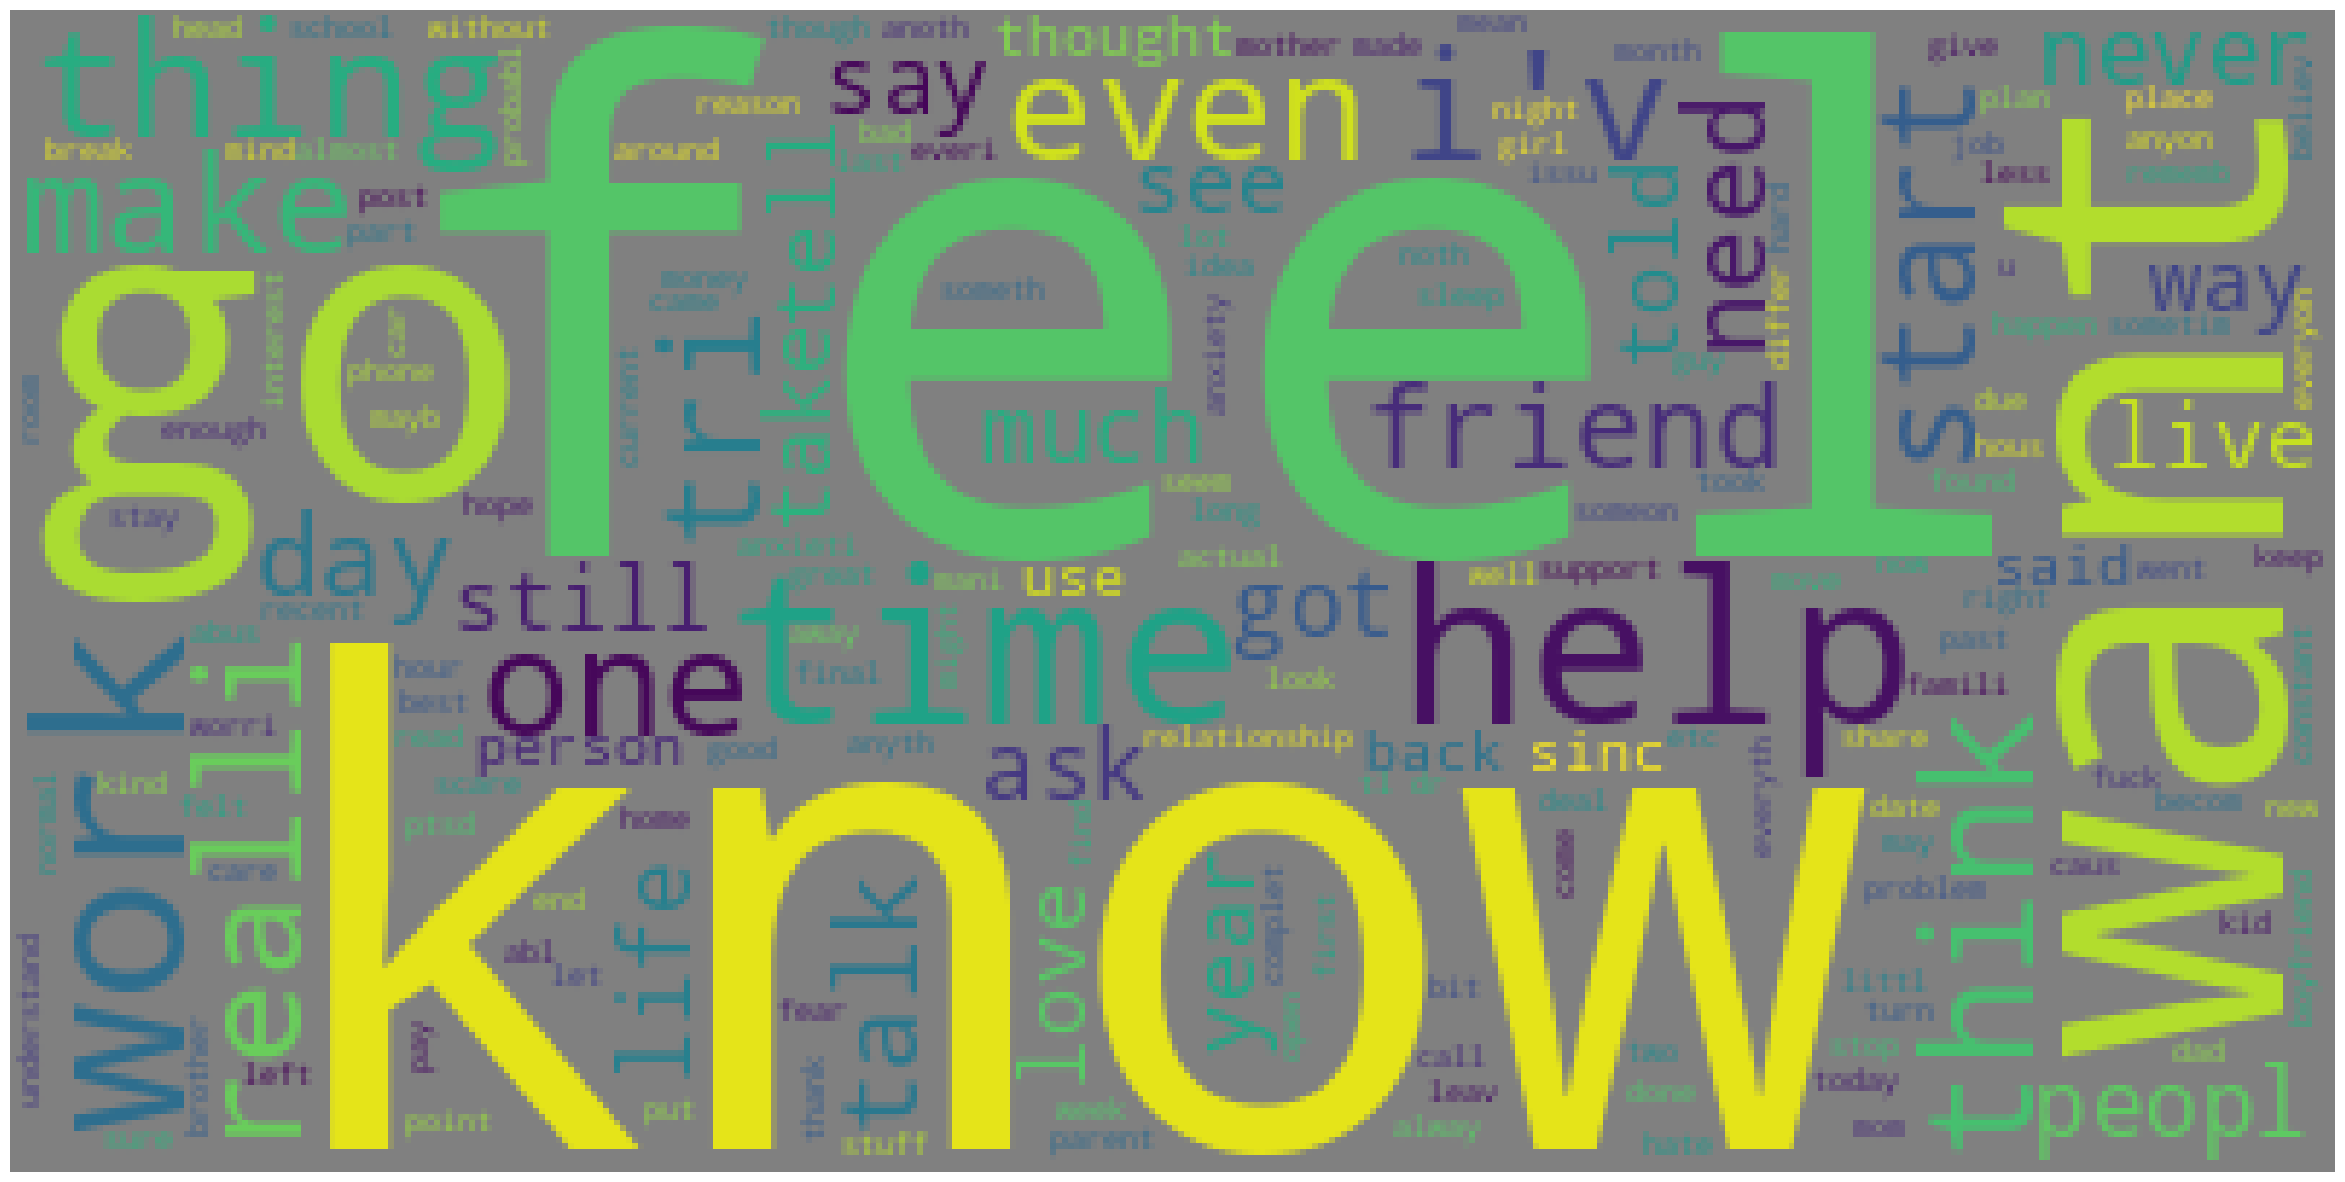

In [ ]:
#Wordcloud
def wc(data,bgcolor):
    plt.figure(figsize=(30,30))
    #mask=np.array(Image.open('/kaggle/input/stressanalysisinsocialmedia/stress-954814_960_720.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
wc(posts.text,'grey')

In [ ]:
#Adding meaning to text from og dataset
posts["meaning"] = full["label"].map({0:"Unstressed", 1:"Stressed"})
#posts = posts[["text", "meaning"]]
posts.head()

,text,sentiment,meaning
0,"said felt way before, sugget go rest ..trigger...",-0.002742,Stressed
1,"hey r/assistance, sure right place post this.....",0.292857,Unstressed
2,"mom hit newspap shock would this, know like pl...",0.011894,Stressed
3,"met new boyfriend, amazing, kind, sweet, good ...",0.141671,Stressed
4,octob domest violenc awar month domest violenc...,-0.204167,Stressed


In [ ]:
#Applying sentiment
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

,text,sentiment,meaning
0,"said felt way before, sugget go rest ..trigger...",0.027273,Stressed
1,"hey r/assistance, sure right place post this.....",0.360714,Unstressed
2,"mom hit newspap shock would this, know like pl...",0.199273,Stressed
3,"met new boyfriend, amazing, kind, sweet, good ...",0.190156,Stressed
4,octob domest violenc awar month domest violenc...,-0.085714,Stressed


<Axes: xlabel='meaning', ylabel='count'>

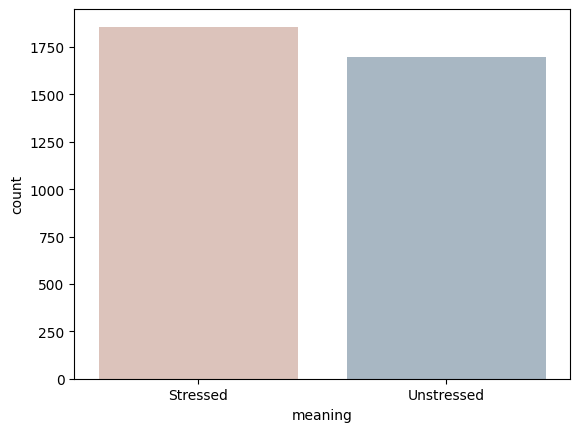

In [ ]:
#sns.displot(x=posts.meaning, kind='kde')
sns.countplot(x='meaning',data = posts, palette= ["#e1c0b6", "#a3b8c8"])

In [ ]:
#Assign variables; x = features & y = target
x = posts.text
y = posts.meaning

In [ ]:
vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier()
knnc = knn.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(knnc, y_test)
print("Model Accuracy is {p}%".format(p=round(accuracy * 100, 2)))


Model Accuracy is 56.36%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

print("Model Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Model Accuracy is 73.79%


In [ ]:
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression().fit(x_train, y_train)
score = m2.score(x_test,y_test)
#accuracy_score(m2,y_test)
print("Model Accuracy is {p}%".format(p =round (score*100, 2)))

Model Accuracy is 72.44%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Model Accuracy is 61.87%


In [ ]:
#Using Naive Bayes
prompt = "I hate the way my bond is breaking from everyone"
p = vect.transform([prompt]).toarray()
op = mb.predict(p)
print(op)

['Stressed']


In [ ]:
#Using Naive Bayes
prompt = "i like this dress, material feels quite comfortable"
p = vect.transform([prompt]).toarray()
op = mb.predict(p)
print(op)

['Unstressed']


In [ ]:
#Using Logistic Regression
prompt = "The weather is good today"
p = vect.transform([prompt]).toarray()
op = m2.predict(p)
print(op)

['Unstressed']


In [ ]:
#Using Logistic Regression
prompt = "i feel sick, i don't think i feel good"
p = vect.transform([prompt]).toarray()
op = m2.predict(p)
print(op)

['Stressed']


In [ ]:
#Using Decision Trees
prompt = "Sometime I feel like I need some time"
p = vect.transform([prompt]).toarray()
op = d.predict(p)
print(op)

['Stressed']


In [ ]:
#Using Decision Trees
prompt = "i love red colour, it looks beautiful"
p = vect.transform([prompt]).toarray()
op = d.predict(p)
print(op)

['Unstressed']


In [ ]:
#Using KNN classifier
prompt = "schedule is getting too hectic, i need a vacation"
p = vect.transform([prompt]).toarray()
op = knn.predict(p)
print(op)

['Unstressed']


In [ ]:
#Using KNN classifier
prompt = "i don't like it here, i want to go away"
p = vect.transform([prompt]).toarray()
op = knn.predict(p)
print(op)

['Unstressed']


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

# Function to evaluate and print additional metrics
def evaluate_model(predictions, y_true):
    # Confusion Matrix
    cm = confusion_matrix(y_true, predictions)
    print("Confusion Matrix:")
    print(cm)

    # F1 Score
    f1 = f1_score(y_true, predictions)
    print("F1 Score: {:.2f}".format(f1))
